In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib as mb 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score 

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
numerical = ['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','HeartDisease']

In [7]:
numerical

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

In [8]:
dfNum = df[numerical]

In [9]:
dfCat = df.drop(columns=numerical)

In [10]:
dfCat

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


In [11]:
dfCat.shape

(918, 5)

In [12]:
dfNum.shape

(918, 7)

In [13]:
df.shape

(918, 12)

<Axes: ylabel='Count'>

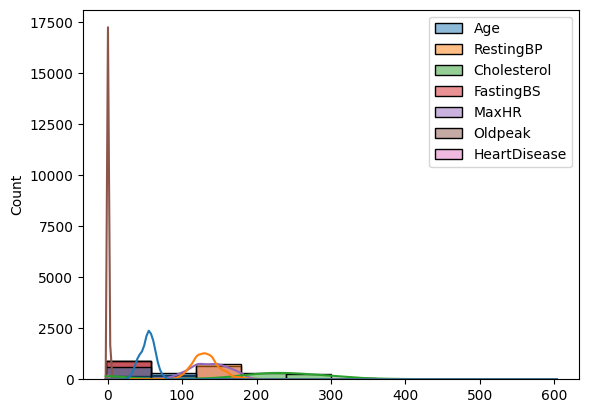

In [14]:
sns.histplot(data=dfNum,bins=10,kde=True)

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<Axes: xlabel='HeartDisease'>

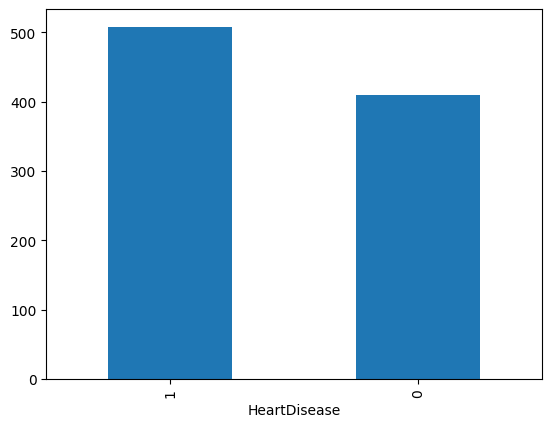

In [17]:
df['HeartDisease'].value_counts().plot(kind='bar')

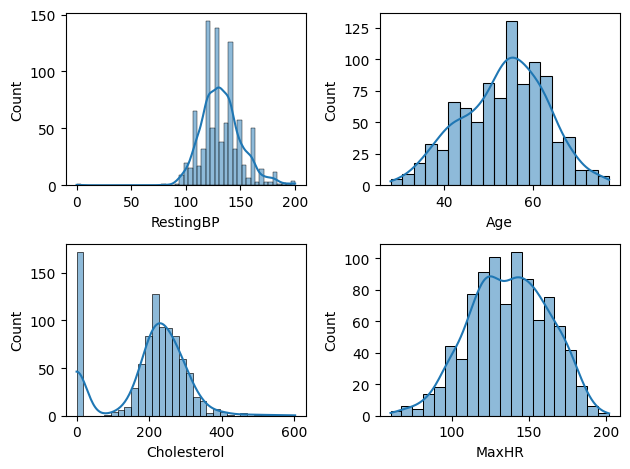

In [18]:
def plotter(graph,num) :
    plt.subplot(2,2,num)
    sns.histplot(df[graph],kde=True)

plotter('RestingBP',1)
plotter('Age',2)
plotter('Cholesterol',3)
plotter('MaxHR',4)

plt.tight_layout()

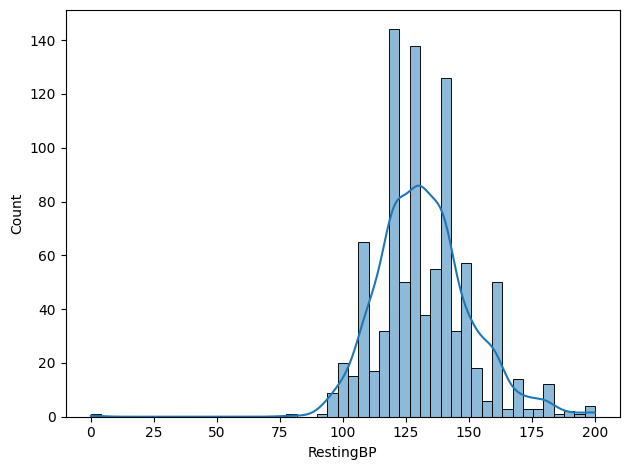

In [19]:
sns.histplot(df['RestingBP'],kde=True)

plt.tight_layout()

In [20]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [21]:
df['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [22]:
df['ChestPainType'].describe()

count     918
unique      4
top       ASY
freq      496
Name: ChestPainType, dtype: object

In [23]:
ch_mean = df.loc[df['Cholesterol'] != 0, 'Cholesterol'].mean()

In [24]:
ch_mean

np.float64(244.6353887399464)

In [25]:
df['Cholesterol'] = df['Cholesterol'].replace(0,ch_mean)
df['Cholesterol'] = df['Cholesterol'].round(2)

In [26]:
df['Cholesterol'].value_counts()

Cholesterol
244.64    172
254.00     11
220.00     10
223.00     10
204.00      9
         ... 
353.00      1
278.00      1
157.00      1
176.00      1
131.00      1
Name: count, Length: 222, dtype: int64

In [27]:
df['Cholesterol']

0      289.0
1      180.0
2      283.0
3      214.0
4      195.0
       ...  
913    264.0
914    193.0
915    131.0
916    236.0
917    175.0
Name: Cholesterol, Length: 918, dtype: float64

In [28]:
df['RestingBP'] = df['RestingBP'].replace(0,ch_mean)
df['RestingBP'] = df['RestingBP'].round(2)

In [29]:
df['RestingBP']

0      140.0
1      160.0
2      130.0
3      138.0
4      150.0
       ...  
913    110.0
914    144.0
915    130.0
916    130.0
917    138.0
Name: RestingBP, Length: 918, dtype: float64

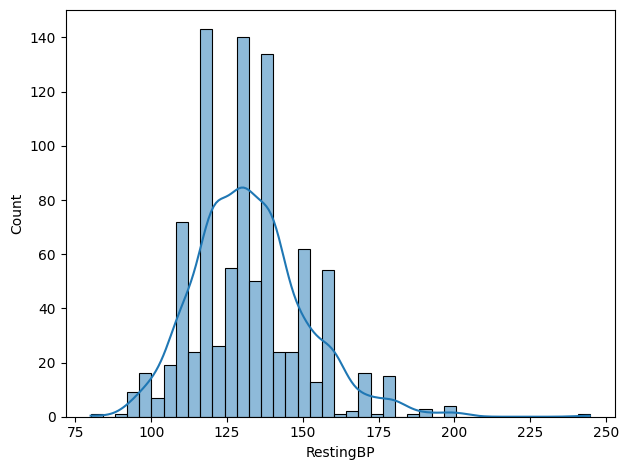

In [30]:
sns.histplot(df['RestingBP'],kde=True)

plt.tight_layout()

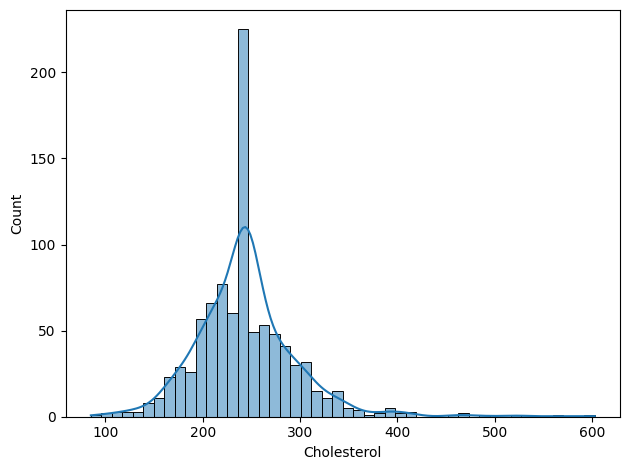

In [31]:
sns.histplot(df['Cholesterol'],kde=True)

plt.tight_layout()

In [32]:
numerical

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

<Axes: xlabel='Oldpeak'>

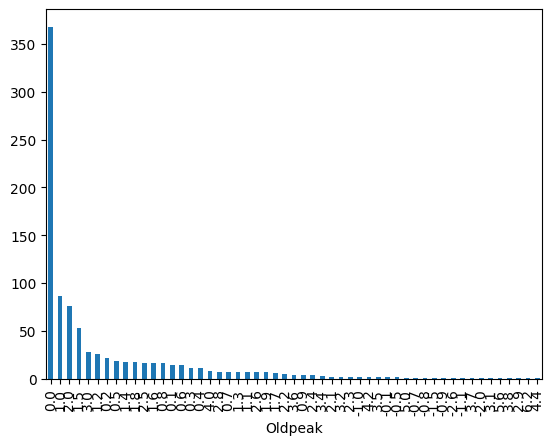

In [33]:
df['Oldpeak'].value_counts().plot(kind='bar')

In [34]:
oldPeakMean = df['Oldpeak'].mean()

In [35]:
# df['Oldpeak'] = df['Oldpeak'].replace(0,oldPeakMean)
df['Oldpeak']

0      0.0
1      1.0
2      0.0
3      1.5
4      0.0
      ... 
913    1.2
914    3.4
915    1.2
916    0.0
917    0.0
Name: Oldpeak, Length: 918, dtype: float64

<Axes: xlabel='Oldpeak'>

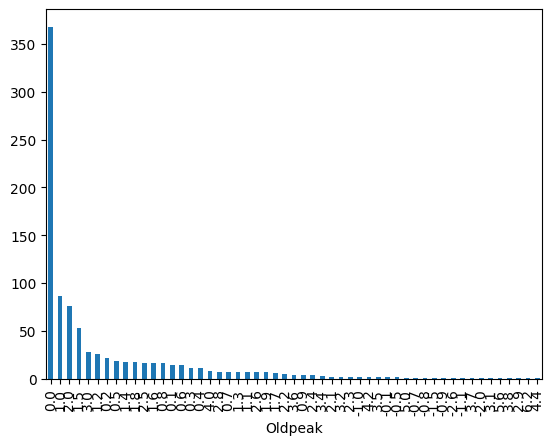

In [36]:
df['Oldpeak'].value_counts().plot(kind='bar')

In [37]:
# pip install sheryanalysis==0.1.0

In [38]:
import sheryanalysis as sh

In [39]:
sh.analyze(df)


🔍 Basic Analysis Report
------------------------------------------------------------
📏 Shape: (918, 12)
🧱 Columns: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

✅ No null values found

🔠 Categorical Columns: ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

🔢 Numerical Columns: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


C:\Users\dipan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sheryanalysis\utils.py:103: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(sample)
C:\Users\dipan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sheryanalysis\utils.py:103: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(sample)
C:\Users\dipan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sheryanalysis\utils.py:103: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(sample)
C:\Users\dipan\AppData\Local\Programs\Python\Python312\Lib\site-packag

{'shape': (918, 12),
 'columns': ['Age',
  'Sex',
  'ChestPainType',
  'RestingBP',
  'Cholesterol',
  'FastingBS',
  'RestingECG',
  'MaxHR',
  'ExerciseAngina',
  'Oldpeak',
  'ST_Slope',
  'HeartDisease'],
 'dtypes': {'Age': dtype('int64'),
  'Sex': dtype('O'),
  'ChestPainType': dtype('O'),
  'RestingBP': dtype('float64'),
  'Cholesterol': dtype('float64'),
  'FastingBS': dtype('int64'),
  'RestingECG': dtype('O'),
  'MaxHR': dtype('int64'),
  'ExerciseAngina': dtype('O'),
  'Oldpeak': dtype('float64'),
  'ST_Slope': dtype('O'),
  'HeartDisease': dtype('int64')},
 'null_counts': {'Age': 0,
  'Sex': 0,
  'ChestPainType': 0,
  'RestingBP': 0,
  'Cholesterol': 0,
  'FastingBS': 0,
  'RestingECG': 0,
  'MaxHR': 0,
  'ExerciseAngina': 0,
  'Oldpeak': 0,
  'ST_Slope': 0,
  'HeartDisease': 0},
 'total_rows': 918,
 'column_types': {'categorical': ['Sex',
   'ChestPainType',
   'FastingBS',
   'RestingECG',
   'ExerciseAngina',
   'ST_Slope',
   'HeartDisease'],
  'numerical': ['Age', 'Rest

In [40]:
dfCat.columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [41]:
numerical

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

<Axes: xlabel='Sex', ylabel='count'>

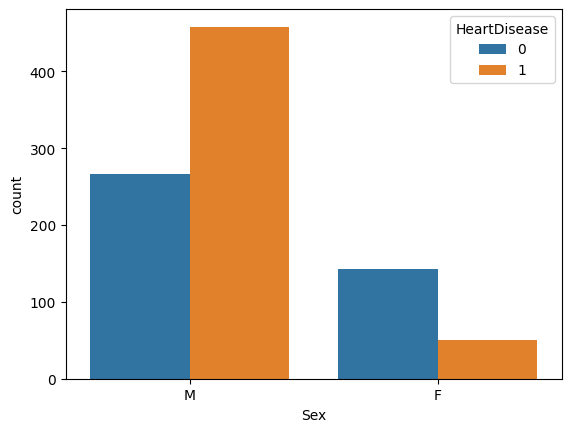

In [42]:
sns.countplot(x=df['Sex'],hue=df['HeartDisease'])

<Axes: xlabel='FastingBS', ylabel='count'>

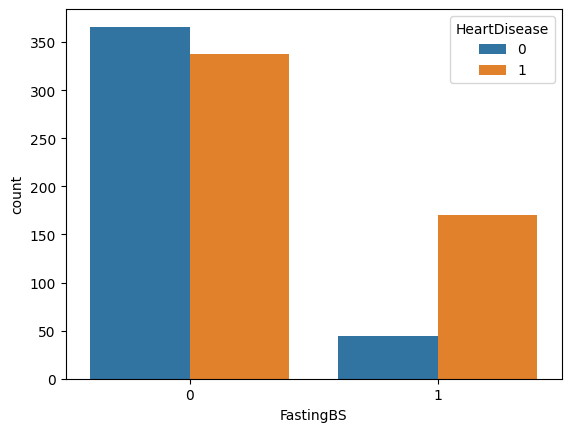

In [43]:
sns.countplot(x=df['FastingBS'],hue=df['HeartDisease'])

<Axes: ylabel='Cholesterol'>

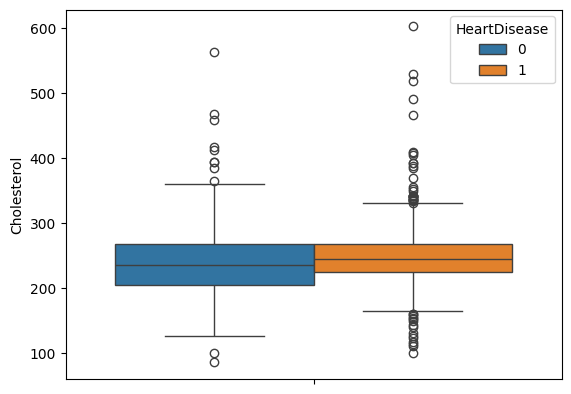

In [44]:
sns.boxplot(y=df['Cholesterol'],hue=df['HeartDisease'])

<Axes: ylabel='Age'>

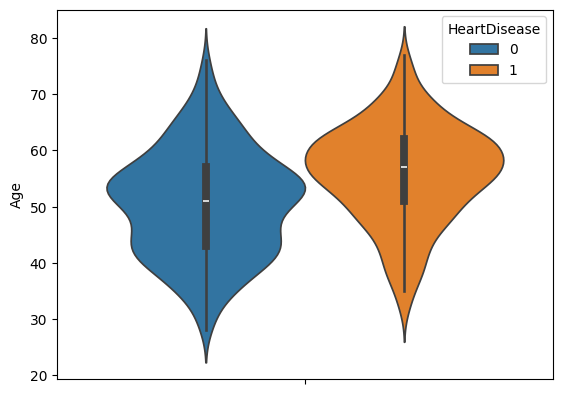

In [45]:
sns.violinplot(y=df['Age'],hue=df['HeartDisease'])

<Axes: >

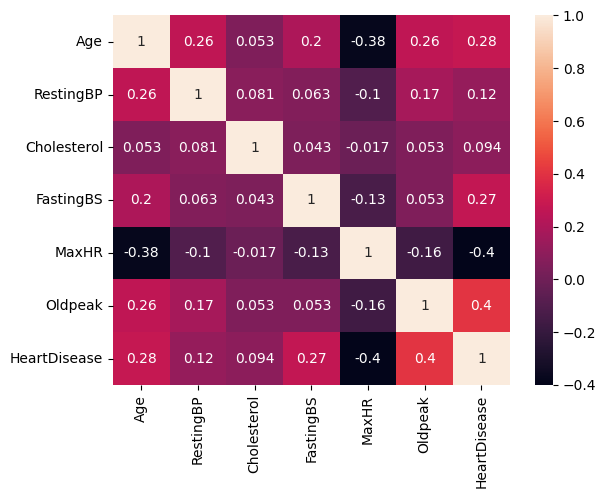

In [46]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [47]:
dfCat

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


In [48]:
df_encoded = pd.get_dummies(df,drop_first=True)

In [49]:
df_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160.0,180.0,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130.0,283.0,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138.0,214.0,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150.0,195.0,0,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144.0,193.0,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130.0,131.0,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130.0,236.0,0,174,0.0,1,False,True,False,False,False,False,False,True,False


In [50]:
df_encoded.astype('int64')

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0,1,0,1,0,0,0,0,0,1,0


In [51]:
numerical

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

In [52]:
scalar = StandardScaler()
numCol = ['Age',
 'RestingBP',
 'Cholesterol',
 'MaxHR',
 'Oldpeak']
df_encoded[numCol] = scalar.fit_transform(df_encoded[numCol])

In [53]:
df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.399696,0.832513,0,1.382928,-0.832432,0,True,True,False,False,True,False,False,False,True
1,-0.478484,1.489232,-1.212938,0,0.754157,0.105664,1,False,False,True,False,True,False,False,True,False
2,-1.751359,-0.145072,0.719919,0,-1.525138,-0.832432,0,True,True,False,False,False,True,False,False,True
3,-0.584556,0.290742,-0.574908,0,-1.132156,0.574711,1,False,False,False,False,True,False,True,True,False
4,0.051881,0.944464,-0.931454,0,-0.581981,-0.832432,0,True,False,True,False,True,False,False,False,True


In [54]:
df_encoded_int = df_encoded.astype("int64")

In [55]:
df_encoded_int.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1
1,0,1,-1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,-1,0,0,0,-1,0,0,1,1,0,0,0,1,0,0,1
3,0,0,0,0,-1,0,1,0,0,0,0,1,0,1,1,0
4,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, SVR
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report,
    mean_squared_error, mean_absolute_error, r2_score,
    roc_curve, auc
)
from imblearn.over_sampling import SMOTE
import joblib
import pickle
import warnings
warnings.filterwarnings("ignore")

In [57]:
X = df_encoded.drop('HeartDisease',axis=1)
y = df_encoded["HeartDisease"] 

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [59]:
scaler = StandardScaler()

In [60]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [61]:
models = {
    "logistic Regression" : LogisticRegression(), 
    "knn" : KNeighborsClassifier(), 
    "GNb" : GaussianNB(), 
    "decision tree" : DecisionTreeClassifier(), 
    "svc" : SVC(),
}

In [62]:
result = []

In [63]:
for name,model in models.items() : 
    model.fit(X_train_scaled,y_train)
    ypred =model.predict(X_test_scaled)
    acc = accuracy_score(y_test,ypred)
    f1 = f1_score(y_test,ypred) 
    
    result.append({
        "model Name" : name,
        "accuracy":acc,
        "f1 score":f1, 
    })
    

In [64]:
result

[{'model Name': 'logistic Regression',
  'accuracy': 0.8695652173913043,
  'f1 score': 0.8846153846153846},
 {'model Name': 'knn',
  'accuracy': 0.8532608695652174,
  'f1 score': 0.8708133971291866},
 {'model Name': 'GNb',
  'accuracy': 0.8532608695652174,
  'f1 score': 0.8682926829268293},
 {'model Name': 'decision tree',
  'accuracy': 0.782608695652174,
  'f1 score': 0.8113207547169812},
 {'model Name': 'svc',
  'accuracy': 0.8478260869565217,
  'f1 score': 0.8679245283018868}]

In [65]:
accuracyNp = np.array(result)

In [66]:
# joblib.dump(models['knn'],"")

In [68]:


# Save KNN model
with open("knn_model.pkl", "wb") as f:
    pickle.dump(models['knn'], f)

# Save Scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Save Feature Column Names
with open("feature_columns.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)
